<a href="https://colab.research.google.com/github/KaiqiangZheng/4SC3/blob/master/Kai_4SC3_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly_express

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly_express as px

import warnings
warnings.filterwarnings('ignore')

#Lushao GITHUB WUDI
https://github.com/KaiqiangZheng/4SC3/tree/master/Project

1.CO2 EMiSSIONS: https://ourworldindata.org/transport

2.Safety: https://ourworldindata.org/grapher/death-rate-road-traffic-injuries

3.Traffic Congestion Ranking Worldwide: https://www.kaggle.com/datasets/kkhandekar/worldwide-traffic-congestion-ranking/

In [ ]:
#1 CO2 EMISSIONS DATASET
url = 'https://raw.githubusercontent.com/KaiqiangZheng/4SC3/master/Project/per-capita-co2-transport.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df1

,Entity,Code,Year,Per capita carbon dioxide emissions from transport
0,Afghanistan,AFG,1990,0.091633
1,Afghanistan,AFG,1991,0.086551
2,Afghanistan,AFG,1992,0.061373
3,Afghanistan,AFG,1993,0.052843
4,Afghanistan,AFG,1994,0.047232
...,...,...,...,...
6223,Zimbabwe,ZWE,2016,0.148761
6224,Zimbabwe,ZWE,2017,0.149819
6225,Zimbabwe,ZWE,2018,0.188677
6226,Zimbabwe,ZWE,2019,0.163469


In [ ]:
# Display basic statistics of the dataset
print(df1.describe())

              Year  Per capita carbon dioxide emissions from transport
count  6228.000000                                        6228.000000 
mean   2005.086384                                           1.029400 
std       8.933416                                           1.312915 
min    1990.000000                                           0.000000 
25%    1997.000000                                           0.173003 
50%    2005.000000                                           0.625455 
75%    2013.000000                                           1.460995 
max    2020.000000                                          15.509779 


In [ ]:
# Data info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Entity                                              6228 non-null   object 
 1   Code                                                5887 non-null   object 
 2   Year                                                6228 non-null   int64  
 3   Per capita carbon dioxide emissions from transport  6228 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 194.8+ KB


In [ ]:
# Check for missing values
print(df1.isnull().sum())

Entity                                                  0
Code                                                  341
Year                                                    0
Per capita carbon dioxide emissions from transport      0
dtype: int64


In [ ]:
df_nan = df1[df1.isna().any(axis=1)]  #=1 is column and =0 is row
print(df_nan)

                             Entity Code  Year  \
31                           Africa  NaN  1990   
32                           Africa  NaN  1991   
33                           Africa  NaN  1992   
34                           Africa  NaN  1993   
35                           Africa  NaN  1994   
...                             ...  ...   ...   
5944  Upper-middle-income countries  NaN  2016   
5945  Upper-middle-income countries  NaN  2017   
5946  Upper-middle-income countries  NaN  2018   
5947  Upper-middle-income countries  NaN  2019   
5948  Upper-middle-income countries  NaN  2020   

      Per capita carbon dioxide emissions from transport  
31                                             0.175975   
32                                             0.179470   
33                                             0.183605   
34                                             0.177685   
35                                             0.175445   
...                                          

In [ ]:
# Remove NaN and check the shape and info
df1 = df1.dropna(axis=0)
df1.info()
print(df1.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5887 entries, 0 to 6227
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Entity                                              5887 non-null   object 
 1   Code                                                5887 non-null   object 
 2   Year                                                5887 non-null   int64  
 3   Per capita carbon dioxide emissions from transport  5887 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 230.0+ KB
(5887, 4)


In [ ]:
name_counts = df1['Entity'].value_counts()
print(name_counts)

Afghanistan    31
Palau          31
Nicaragua      31
Niger          31
Nigeria        31
               ..
Cambodia       26
Laos           21
Suriname       21
Montenegro     16
South Sudan     9
Name: Entity, Length: 192, dtype: int64


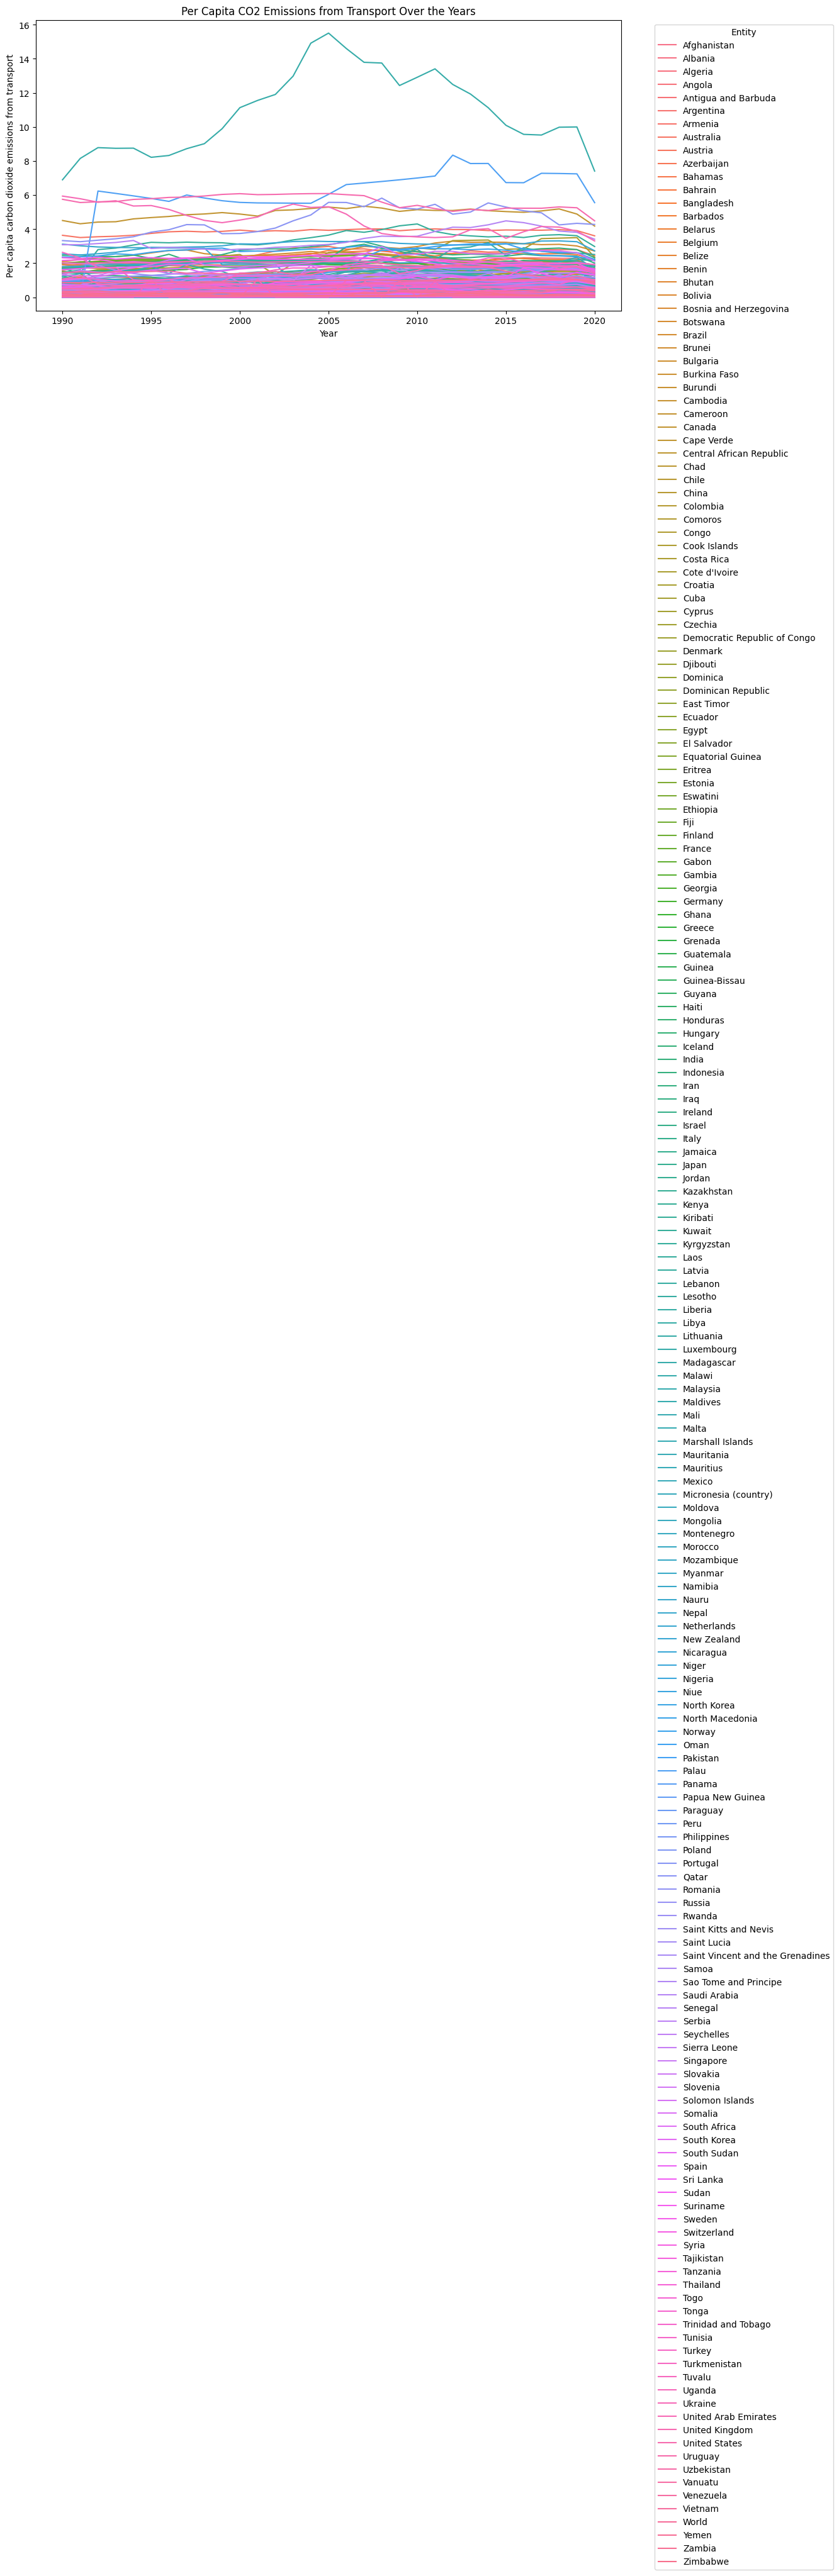

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Per capita carbon dioxide emissions from transport', hue='Entity', data=df1)
plt.title('Per Capita CO2 Emissions from Transport Over the Years')
plt.xlabel('Year')
plt.ylabel('Per capita carbon dioxide emissions from transport')
plt.legend(title='Entity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

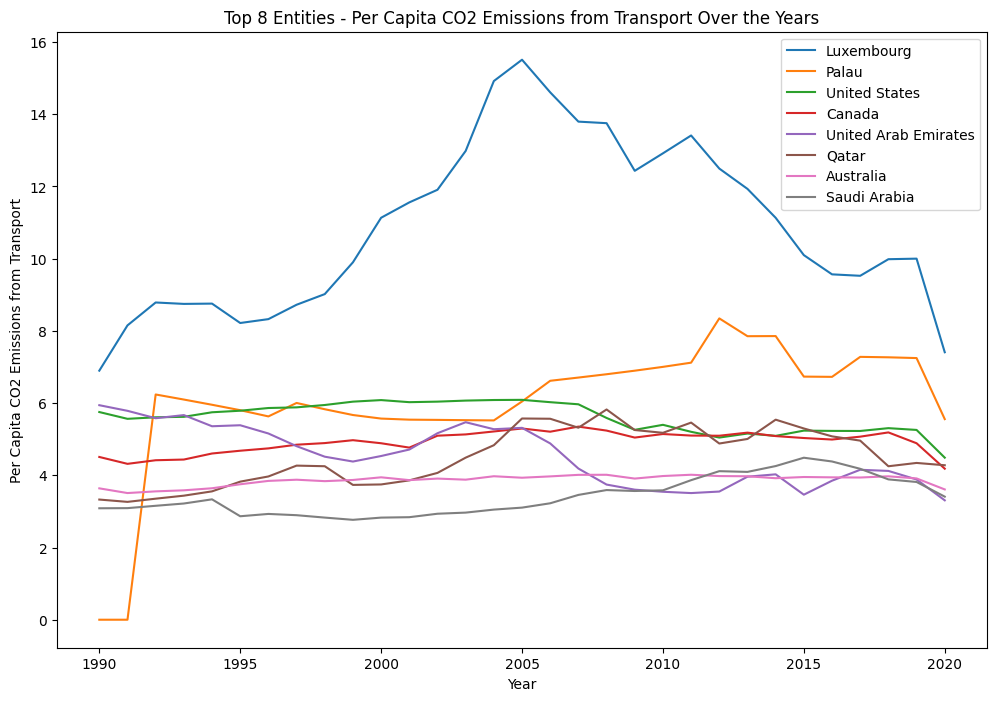

In [ ]:
# plot the top 8 entities by total per capita emissions
top_entities = df1.groupby('Entity')['Per capita carbon dioxide emissions from transport'].sum().nlargest(8).index

plt.figure(figsize=(12, 8))

for entity in top_entities:
    entity_data = df1[df1['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['Per capita carbon dioxide emissions from transport'], label=entity)

plt.xlabel('Year')
plt.ylabel('Per Capita CO2 Emissions from Transport')
plt.title('Top 8 Entities - Per Capita CO2 Emissions from Transport Over the Years')
plt.legend()
plt.show()

In [ ]:
entities_of_interest = ['United States', 'Canada', 'Norway', 'China', 'India', 'United Kingdom', 'Netherlands', 'Australia']
filtered_df1 = df1[df1['Entity'].isin(entities_of_interest)]

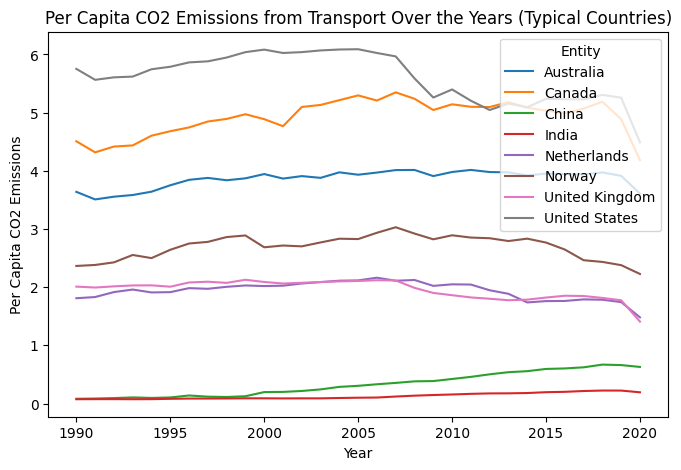

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Year', y='Per capita carbon dioxide emissions from transport', hue='Entity', data=filtered_df1)
plt.title('Per Capita CO2 Emissions from Transport Over the Years (Typical Countries)')
plt.xlabel('Year')
plt.ylabel('Per Capita CO2 Emissions')
plt.show()

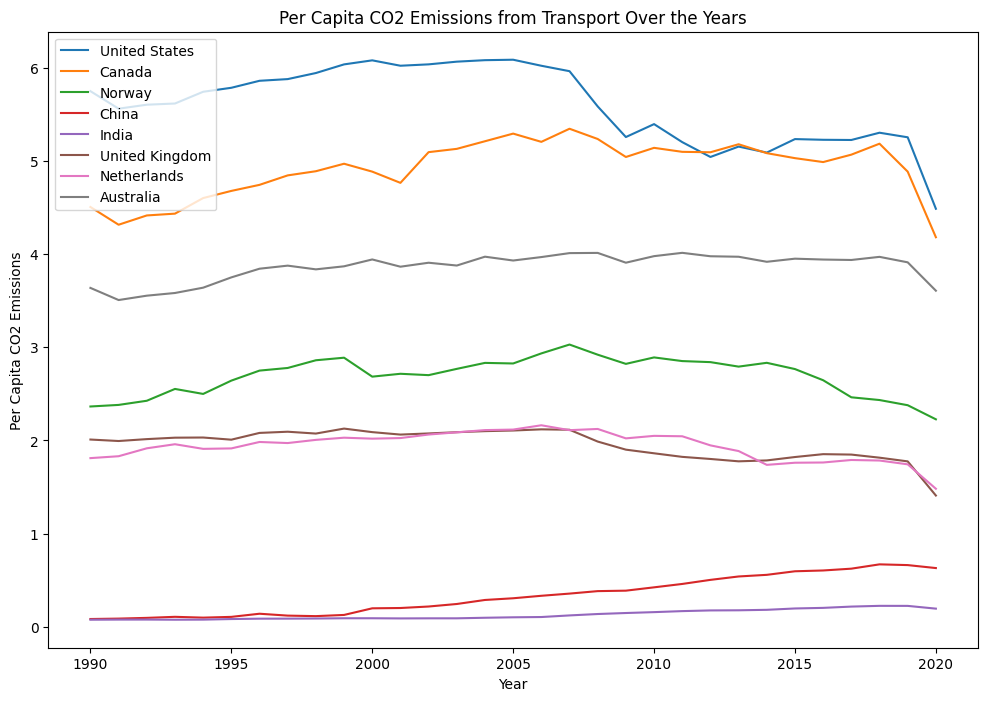

In [ ]:
#Alternative way by using matplotlib
plt.figure(figsize=(12, 8))
for entity in entities_of_interest:
    entity_data = filtered_df1[filtered_df1['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['Per capita carbon dioxide emissions from transport'], label=entity)

plt.title('Per Capita CO2 Emissions from Transport Over the Years')
plt.xlabel('Year')
plt.ylabel('Per Capita CO2 Emissions')
plt.legend()
plt.show()

In [ ]:
#2 Safety DATASET
url2 = 'https://raw.githubusercontent.com/KaiqiangZheng/4SC3/master/Project/death-rate-road-traffic-injuries.csv'
df2 = pd.read_csv(url2)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df2.head()

,Entity,Code,Year,"3.6.1 - Death rate due to road traffic injuries, by sex (per 100,000 population) - SH_STA_TRAF - Both sexes"
0,Afghanistan,AFG,2000,14.7
1,Afghanistan,AFG,2005,15.2
2,Afghanistan,AFG,2010,14.4
3,Afghanistan,AFG,2015,14.4
4,Afghanistan,AFG,2019,15.9


In [ ]:
df2 = df2.rename(columns={'3.6.1 - Death rate due to road traffic injuries, by sex (per 100,000 population) - SH_STA_TRAF - Both sexes': 'Death rate due to road traffic injuries (per 100,000 population)'})

In [ ]:
df2.head()

,Entity,Code,Year,"Death rate due to road traffic injuries (per 100,000 population)"
0,Afghanistan,AFG,2000,14.7
1,Afghanistan,AFG,2005,15.2
2,Afghanistan,AFG,2010,14.4
3,Afghanistan,AFG,2015,14.4
4,Afghanistan,AFG,2019,15.9


In [ ]:
# Data info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 4 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            940 non-null    object 
 1   Code                                                              915 non-null    object 
 2   Year                                                              940 non-null    int64  
 3   Death rate due to road traffic injuries (per 100,000 population)  940 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 29.5+ KB


In [ ]:
# Check for missing values
print(df2.isnull().sum())

Entity                                                               0
Code                                                                25
Year                                                                 0
Death rate due to road traffic injuries (per 100,000 population)     0
dtype: int64


In [ ]:
df_nan2 = df2[df2.isna().any(axis=1)]  #=1 is column and =0 is row
print(df_nan2)

                                   Entity Code  Year  \
155        Central and Southern Asia (UN)  NaN  2000   
156        Central and Southern Asia (UN)  NaN  2005   
157        Central and Southern Asia (UN)  NaN  2010   
158        Central and Southern Asia (UN)  NaN  2015   
159        Central and Southern Asia (UN)  NaN  2019   
245   Eastern and South-Eastern Asia (UN)  NaN  2000   
246   Eastern and South-Eastern Asia (UN)  NaN  2005   
247   Eastern and South-Eastern Asia (UN)  NaN  2010   
248   Eastern and South-Eastern Asia (UN)  NaN  2015   
249   Eastern and South-Eastern Asia (UN)  NaN  2019   
290      Europe and Northern America (UN)  NaN  2000   
291      Europe and Northern America (UN)  NaN  2005   
292      Europe and Northern America (UN)  NaN  2010   
293      Europe and Northern America (UN)  NaN  2015   
294      Europe and Northern America (UN)  NaN  2019   
465  Latin America and the Caribbean (UN)  NaN  2000   
466  Latin America and the Caribbean (UN)  NaN  

In [ ]:
# Remove NaN and check the shape and info
df2 = df2.dropna(axis=0)
df2.info()
print(df2.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 939
Data columns (total 4 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            915 non-null    object 
 1   Code                                                              915 non-null    object 
 2   Year                                                              915 non-null    int64  
 3   Death rate due to road traffic injuries (per 100,000 population)  915 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 35.7+ KB
(915, 4)


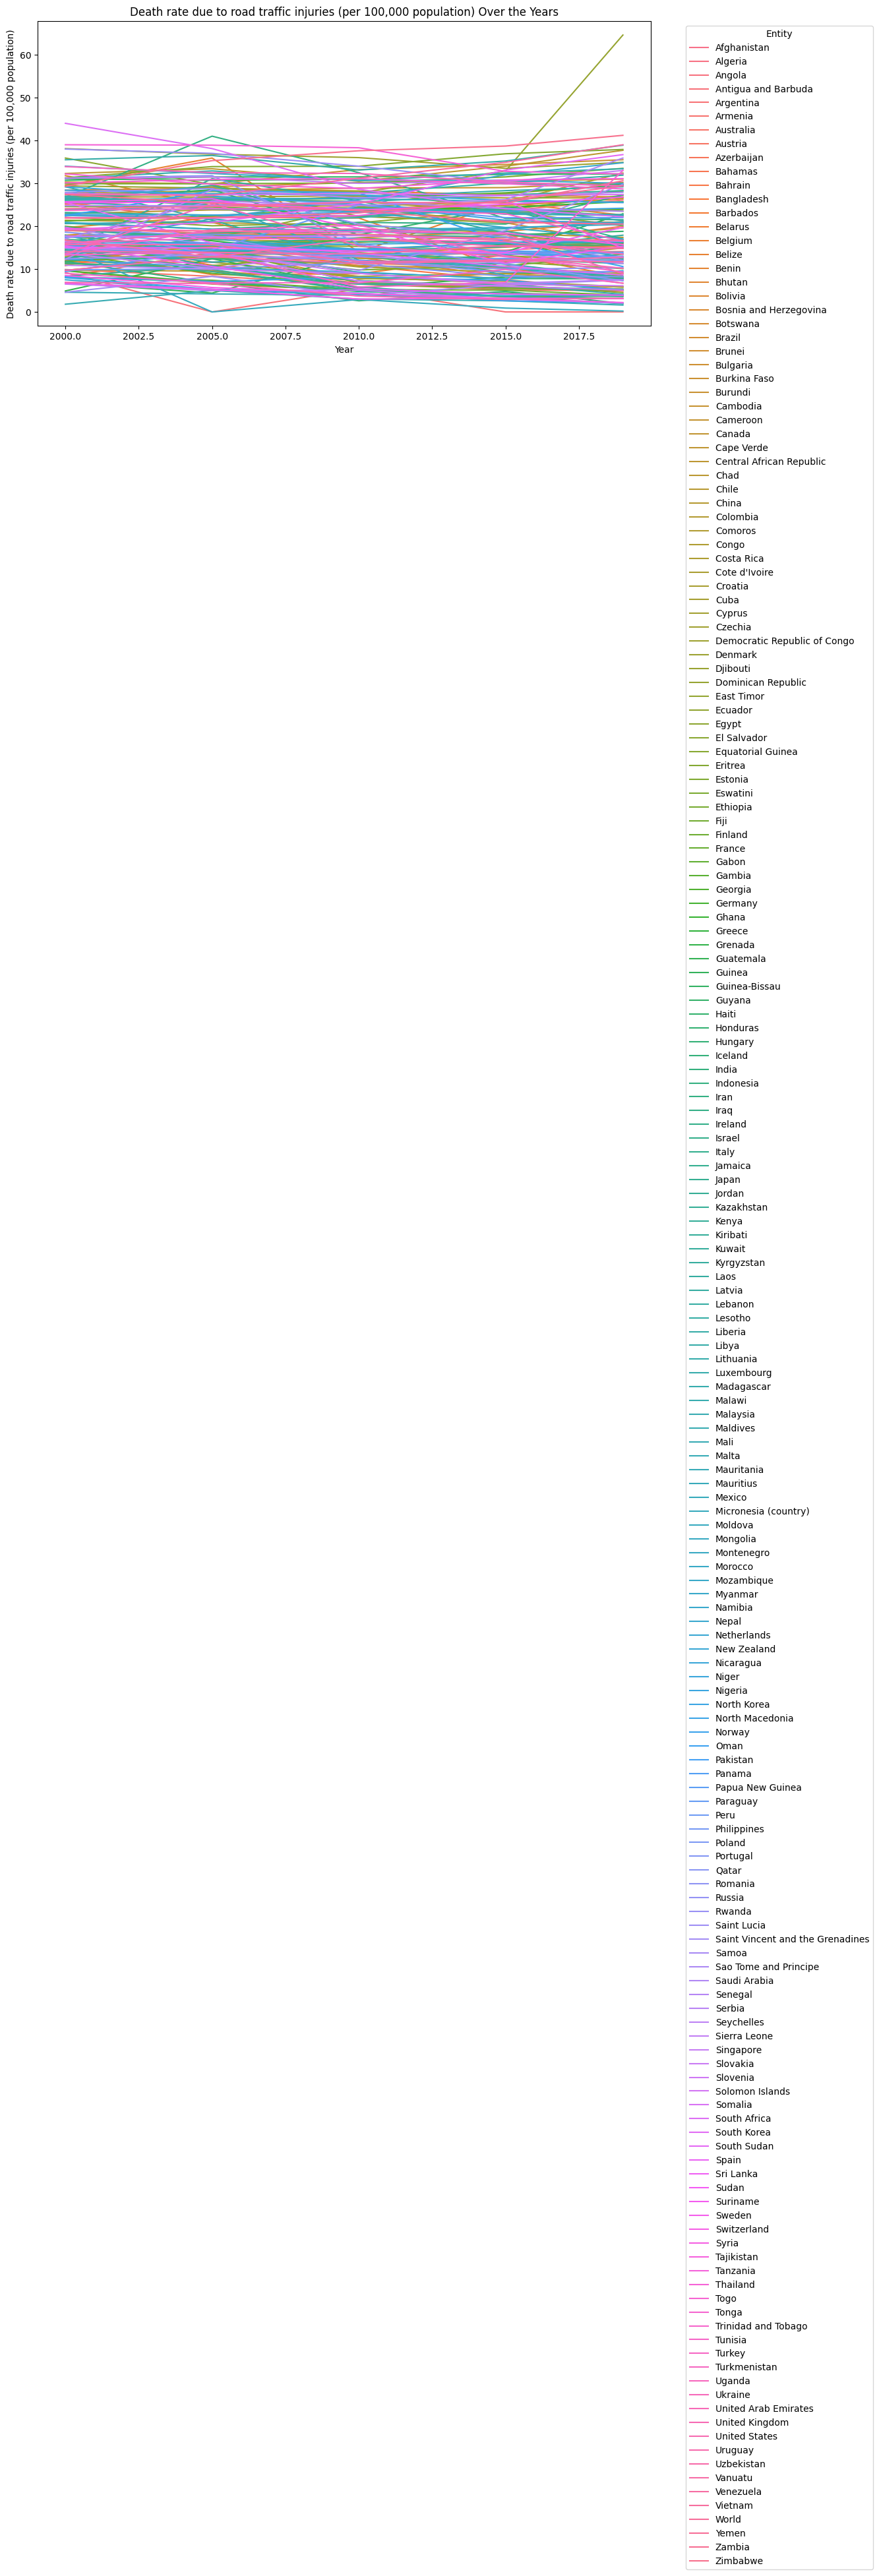

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Death rate due to road traffic injuries (per 100,000 population)', hue='Entity', data=df2)
plt.title('Death rate due to road traffic injuries (per 100,000 population) Over the Years')
plt.xlabel('Year')
plt.ylabel('Death rate due to road traffic injuries (per 100,000 population)')
plt.legend(title='Entity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

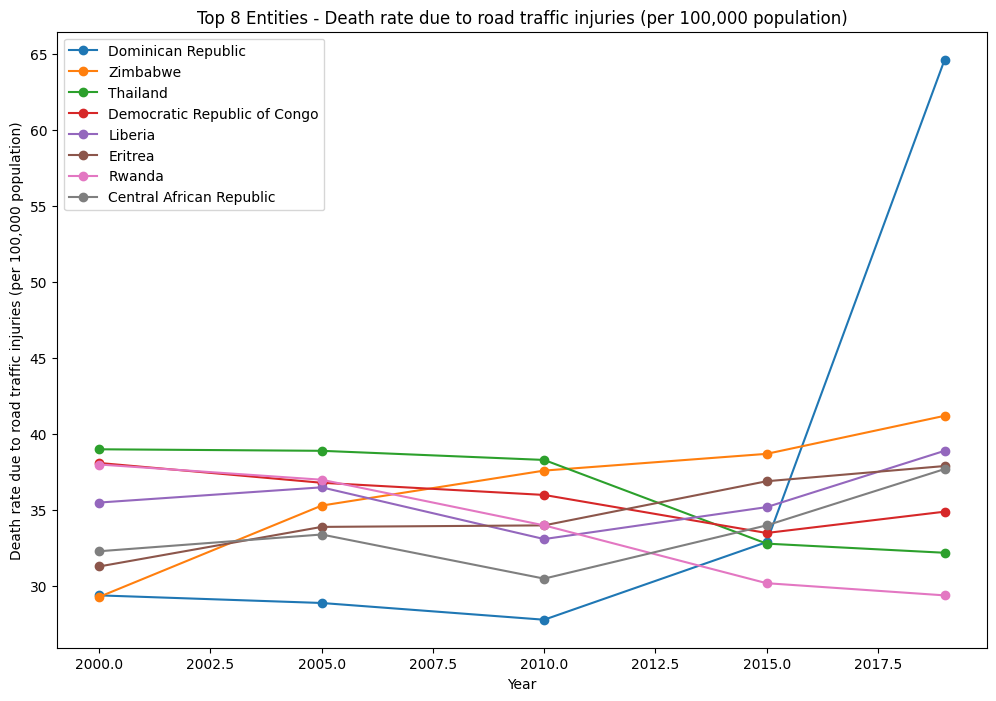

In [ ]:
# plot the top 8 entities by total per capita emissions
top_entities2 = df2.groupby('Entity')['Death rate due to road traffic injuries (per 100,000 population)'].sum().nlargest(8).index

plt.figure(figsize=(12, 8))

for entity in top_entities2:
    entity_data = df2[df2['Entity'] == entity]
    plt.plot(entity_data['Year'], entity_data['Death rate due to road traffic injuries (per 100,000 population)'], label=entity,marker='o')

plt.xlabel('Year')
plt.ylabel('Death rate due to road traffic injuries (per 100,000 population)')
plt.title('Top 8 Entities - Death rate due to road traffic injuries (per 100,000 population)')
plt.legend()
plt.show()

In [ ]:
entities_of_interest2 = ['Central and Southern Asia (UN)', 'Eastern and South-Eastern Asia (UN)', 'Europe and Northern America (UN)', 'Latin America and the Caribbean (UN)', 'Sub-Saharan Africa (UN)']
filtered_df2 = df_nan2[df_nan2['Entity'].isin(entities_of_interest2)]

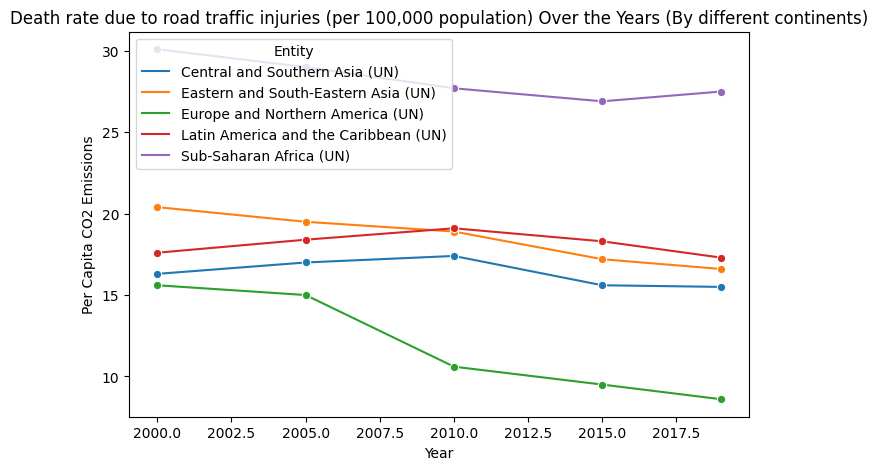

In [ ]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Year', y='Death rate due to road traffic injuries (per 100,000 population)', hue='Entity', data=filtered_df2,marker='o')
plt.title('Death rate due to road traffic injuries (per 100,000 population) Over the Years (By different continents)')
plt.xlabel('Year')
plt.ylabel('Per Capita CO2 Emissions')
plt.show()

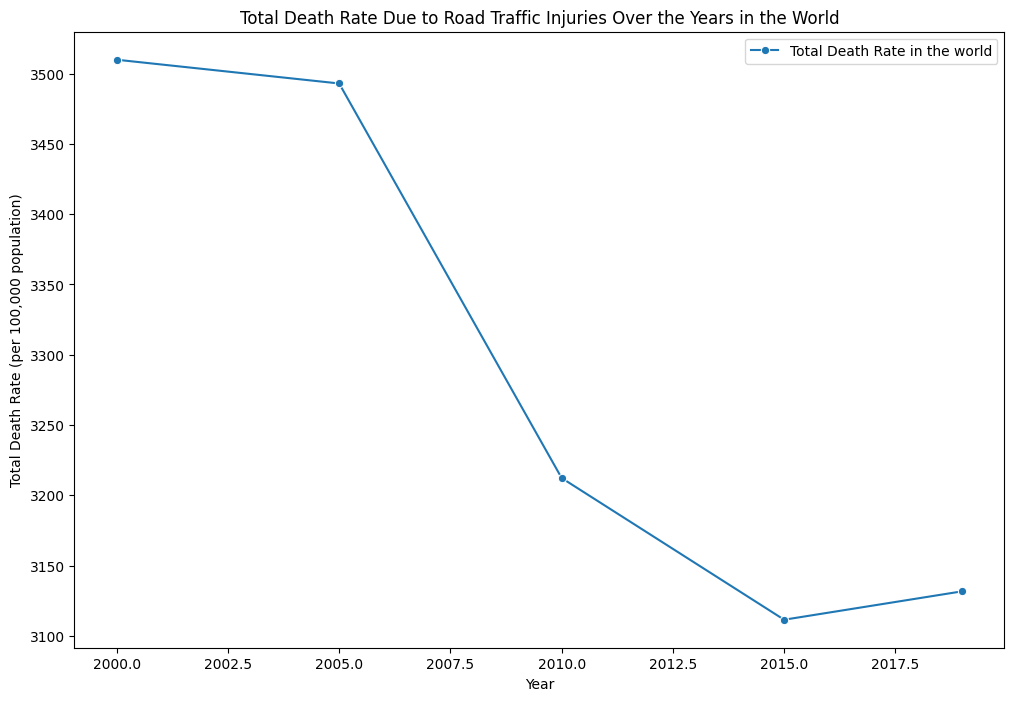

In [ ]:
plt.figure(figsize=(12, 8))

# Group by year and calculate the sum of death rates for all entities
total_death_rate = df2.groupby('Year')['Death rate due to road traffic injuries (per 100,000 population)'].sum().reset_index()

# Plotting the graph
sns.lineplot(x='Year', y='Death rate due to road traffic injuries (per 100,000 population)', data=total_death_rate, label='Total Death Rate in the world',marker='o')

plt.title('Total Death Rate Due to Road Traffic Injuries Over the Years in the World')
plt.xlabel('Year')
plt.ylabel('Total Death Rate (per 100,000 population)')
plt.show()

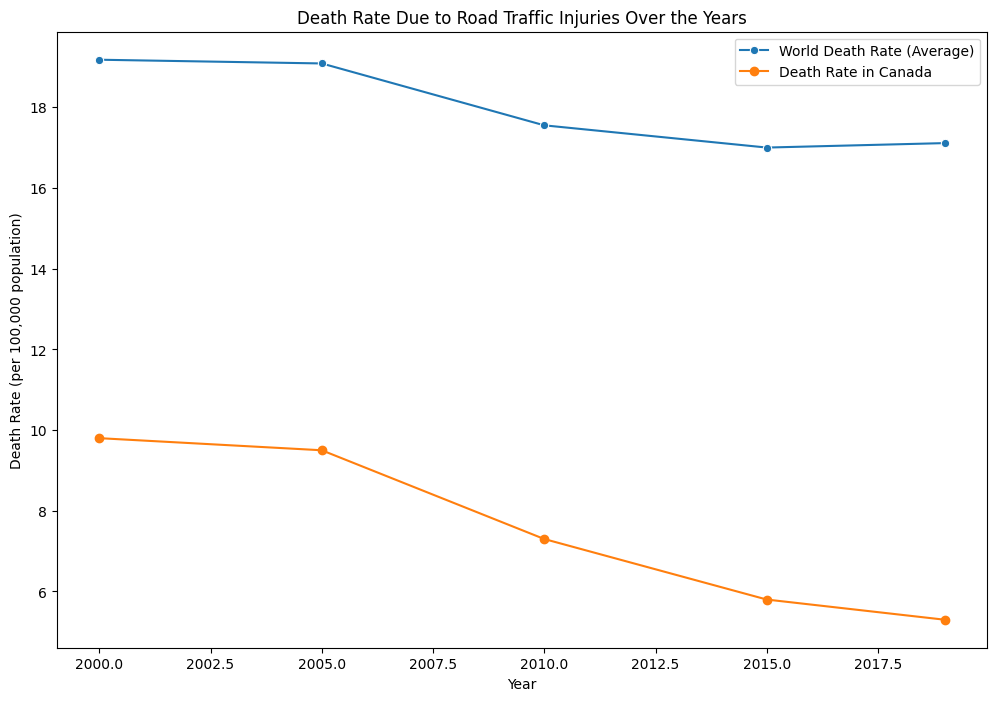

In [ ]:
plt.figure(figsize=(12, 8))
canada_data = df2[df2['Entity'] == 'Canada']
# Group by year and calculate the average of death rates for the sum
average_death_rate = df2.groupby('Year')['Death rate due to road traffic injuries (per 100,000 population)'].mean().reset_index()

# Plotting the graph
sns.lineplot(x='Year', y='Death rate due to road traffic injuries (per 100,000 population)', data=average_death_rate,label='World Death Rate (Average)',marker='o')
plt.plot(canada_data['Year'], canada_data['Death rate due to road traffic injuries (per 100,000 population)'], marker='o',label='Death Rate in Canada')
plt.title('Death Rate Due to Road Traffic Injuries Over the Years')
plt.xlabel('Year')
plt.ylabel('Death Rate (per 100,000 population)')
plt.legend()
plt.show()

#Worldwide Traffic Congestion Ranking
Worldwide Traffic Congestion Ranking [between: 19Jun2022 & 26Jun2022]
TCI, calculated only for the center of the tracked location (the city image is split in 9 equal rectangles, forming a 3x3 grid. The central rectangle is taken into consideration when calculating TCI).

Every 20 minutes, the web app saves an image for each tracked location, containing the traffic data reported by Google Maps. After a couple of minutes, the images are analyzed, and the percentages of the 4 traffic colors are calculated.

Let's call these percentages:
green → P0
orange → P1
red → P2
dark red → P3

Obviously , the sum of all these percentages is 100:
P0 + P1 + P2 + P3 = 100
Based on these percentages, the TCI (Traffic Congestion Index) is calculated:

TCI = (0 * P0) + (1 * P1) + (2 * P2) + (3 * P3)

So the minimum value of TCI is 0, and the maximum value of TCI is 300 (highly improbable to happen).

In [ ]:
#3 Traffic Congestion Ranking DATASET
url3 = 'https://raw.githubusercontent.com/KaiqiangZheng/4SC3/master/Project/TrafficIndex_19Jun2022-26Jun2022.csv'
df3 = pd.read_csv(url3)
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df3.head()  #TCI: Traffic Congestion Index

,Rank,City,AverageTCI,MaxTCI
0,1,Lagos,60.16,130.21
1,2,Riga,47.12,87.51
2,3,Mumbai,38.37,153.41
3,4,Tehran,38.20,110.12
4,5,London,38.16,128.50


In [ ]:
# Data info
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        68 non-null     int64  
 1   City        68 non-null     object 
 2   AverageTCI  68 non-null     float64
 3   MaxTCI      68 non-null     float64
 4   location    68 non-null     object 
 5   point       68 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.3+ KB


In [ ]:
#get the location data of cities
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="test")

from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df3['location'] = df3['City'].apply(geocode)
df3['point'] = df3['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [ ]:
df3

,Rank,City,AverageTCI,MaxTCI,location,point
0,1,Lagos,60.16,130.21,"(Lagos, Lagos Island, Lagos, 100242, Nigeria, ...","(6.4550575, 3.3941795, 0.0)"
1,2,Riga,47.12,87.51,"(Rīga, Vidzeme, Latvija, (56.9493977, 24.10518...","(56.9493977, 24.1051846, 0.0)"
2,3,Mumbai,38.37,153.41,"(Mumbai City, Maharashtra, India, (18.9733536,...","(18.9733536, 72.82810491917377, 0.0)"
3,4,Tehran,38.20,110.12,"(شهر تهران, بخش مرکزی شهرستان تهران, شهرستان ت...","(35.6892523, 51.3896004, 0.0)"
4,5,London,38.16,128.50,"(London, Greater London, England, United Kingd...","(51.4893335, -0.14405508452768728, 0.0)"
...,...,...,...,...,...,...
63,64,Singapore,5.23,42.93,"(Singapore, (1.357107, 103.8194992))","(1.357107, 103.8194992, 0.0)"
64,65,Helsinki,4.67,22.43,"(Helsinki, Helsingin seutukunta, Uusimaa, Etel...","(60.1674881, 24.9427473, 0.0)"
65,66,Turin,4.29,46.20,"(Torino, Piemonte, Italia, (45.0677551, 7.6824...","(45.0677551, 7.6824892, 0.0)"
66,67,Valencia,3.40,31.97,"(València, Comarca de València, València / Val...","(39.4697065, -0.3763353, 0.0)"


In [ ]:
df3['latitude']=df3['point'].str[0]
df3['longitude']=df3['point'].str[1]

In [ ]:
df3

,Rank,City,AverageTCI,MaxTCI,location,point,latitude,longitude
0,1,Lagos,60.16,130.21,"(Lagos, Lagos Island, Lagos, 100242, Nigeria, ...","(6.4550575, 3.3941795, 0.0)",6.455057,3.394179
1,2,Riga,47.12,87.51,"(Rīga, Vidzeme, Latvija, (56.9493977, 24.10518...","(56.9493977, 24.1051846, 0.0)",56.949398,24.105185
2,3,Mumbai,38.37,153.41,"(Mumbai City, Maharashtra, India, (18.9733536,...","(18.9733536, 72.82810491917377, 0.0)",18.973354,72.828105
3,4,Tehran,38.20,110.12,"(شهر تهران, بخش مرکزی شهرستان تهران, شهرستان ت...","(35.6892523, 51.3896004, 0.0)",35.689252,51.389600
4,5,London,38.16,128.50,"(London, Greater London, England, United Kingd...","(51.4893335, -0.14405508452768728, 0.0)",51.489334,-0.144055
...,...,...,...,...,...,...,...,...
63,64,Singapore,5.23,42.93,"(Singapore, (1.357107, 103.8194992))","(1.357107, 103.8194992, 0.0)",1.357107,103.819499
64,65,Helsinki,4.67,22.43,"(Helsinki, Helsingin seutukunta, Uusimaa, Etel...","(60.1674881, 24.9427473, 0.0)",60.167488,24.942747
65,66,Turin,4.29,46.20,"(Torino, Piemonte, Italia, (45.0677551, 7.6824...","(45.0677551, 7.6824892, 0.0)",45.067755,7.682489
66,67,Valencia,3.40,31.97,"(València, Comarca de València, València / Val...","(39.4697065, -0.3763353, 0.0)",39.469707,-0.376335


In [ ]:
# Data info
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        68 non-null     int64  
 1   City        68 non-null     object 
 2   AverageTCI  68 non-null     float64
 3   MaxTCI      68 non-null     float64
 4   location    68 non-null     object 
 5   point       68 non-null     object 
 6   latitude    68 non-null     float64
 7   longitude   68 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.4+ KB


<Axes: ylabel='City'>

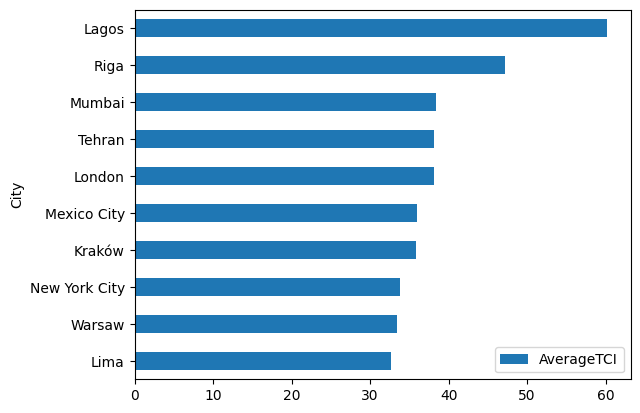

In [ ]:
#Top 10 cities
df3.sort_values(by="AverageTCI",ascending=True).tail(10).plot.barh(x='City',y='AverageTCI')

In [ ]:
#Global map of average TCI
fig = px.scatter_mapbox(df3,lat='latitude',lon='longitude',hover_name='City',hover_data=['AverageTCI'],color='AverageTCI',
    size="AverageTCI",size_max=20,opacity=0.4,
    center={'lat':50, 'lon':9},
    zoom=1,
    height=400,
    width=700)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="City Map for Average TCI")
fig.show()